# Runner

In [3]:
# initialize variables
%load_ext autoreload
%autoreload 2
import os
from players.daniel import Player
from util.runner import run_episode
from players.ava import QLearning
from players.tanay import TicTacTanay
from players.minimax import Minimax
import matplotlib.pyplot as plt
import numpy as np
import torch
# gamma = 1
# illegal_penalty = 0.3
# passive = 0.3
# draw = 1
# player1 = Player(board_length=3, gamma=gamma, lr=0.001, passive=passive, draw=draw, illegal=illegal_penalty)
# player1 = Player(verbose=True)
player1 = Player()
player2 = TicTacTanay()
game_lengths = []
visible_buffer_games=1
invisible_games=20000
player1.training = True
player1.points = 0
player2.points = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Player 1 First

In [ ]:
# PLAYER 1 GAMES
print("Player 1 First Games:")
for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player1, second=player2, game_num=x)

print("Invisible Games Playing...")
avg_len = 50
sum = 0
for x in range(invisible_games):
  sum += run_episode(verbose=False, first=player1, second=player2, game_num=x)
  if (x + 1) % avg_len == 0:
    game_lengths.append(sum / avg_len)
    sum = 0
for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player1, second=player2, game_num=x)


# Player 2 First

In [ ]:
# PLAYER 2 GAMES
print("Player 2 First Games:")
for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player2, second=player1, train=True, game_num=x)

print("Invisible Games Playing...")
avg_len = 50
sum = 0
for x in range(invisible_games):
  sum += run_episode(verbose=False, first=player2, second=player1, train=True, game_num=x)
  if (x + 1) % avg_len == 0:
    game_lengths.append(sum / avg_len)
    sum = 0

for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player2, second=player1, train=True, game_num=x)

# Post-Evaluation

Player 1 Points: 18799
Player 2 Points: 21205
Game Over


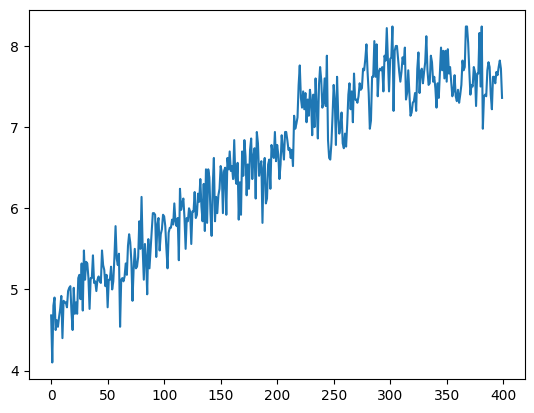

In [5]:
print("Player 1 Points:", player1.points)
print("Player 2 Points:", player2.points)
print("Game Over")
plt.plot(np.arange(len(game_lengths)), game_lengths)
plt.show()